<a href="https://colab.research.google.com/github/Ar8k/Assigment-2.2-CSS-Text-Styling/blob/main/Week10_Assignment_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use the heart attacks dataset to perform logistic regression and predict the values and evaluate the accuracy in which your model has performed.**

Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load dataset as a Pandas dataframe

In [7]:
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv('heartattack_data.csv')
df.head()


Saving heartattack_data.csv to heartattack_data.csv


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Perform Exploratory Data Analysis. You can visualize any features at this point. (Use Groupby/ summary statistics etc)

In [11]:
print ("Shape:", df.shape)
print ("Missing values:\n", df.isnull().sum())
print ("Unique values:\n", df.nunique())
print(df.describe()) #summary of the stats
print("Avg age by target:\n", df.groupby('TenYearCHD')['age'].mean())
print("Count by sex and target:\n", df.groupby(['sex','TenYearCHD']).size()) #using groupby

sns.countplot(x='TenYearCHD', data=df)
plt.title('Heart Attack Count')
plt.show()
sns.heatmap(df.corr(), annot=True, fmt=".2f",cmap="coolwarm")
plt.show()



Shape: (4238, 16)
Missing values:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
Unique values:
 male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64
              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212 

KeyError: 'sex'

Clean the data where necessary - null values, data types, change in feature names. Save the clean data as a new data frame for further analysis

In [10]:
print(df_clean.columns)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [12]:
df_clean = df.copy()
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns #filling the number columns with the mean
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].mean())

categorical_cols = df_clean.select_dtypes(include=['object']).columns #filling the category columns with the mode
for col in categorical_cols:
  df_clean[col]= df_clean[col].fillna(df_clean[col].mode()[0])

df_clean['TenYearCHD'] = df_clean['TenYearCHD'].astype(int) #replacing the correct data type

print(df_clean.info())
print(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None
   male 

Apply Logistic Regression model and fit the data  

(If needed, you will have to transform categorical data into dummy variables)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#making the x and y
X = df_clean.drop('TenYearCHD', axis=1)
y = df_clean['TenYearCHD']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.get_dummies(X, columns=['education'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Fitted. Sample preds:", y_pred[:10])

Model Fitted. Sample preds: [0 0 0 0 0 0 0 0 0 1]


Show performance metrics - Determining the Accuracy on which the model has performed ROC, AUC

Accuracy: 0.8608
AUC: 0.728


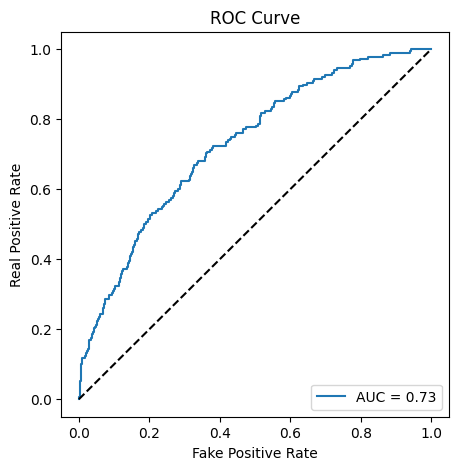

In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

#the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

y_prob = model.predict_proba(X_test)[:,1] #the ROC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", round(auc, 4))
#making the roc curve plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Fake Positive Rate')
plt.ylabel('Real Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Show a correlation matrix between actual values vs predicted values ans explain your insights

                  Actual  Predicted_prob  Predicted
Actual          1.000000        0.314396   0.233207
Predicted_prob  0.314396        1.000000   0.579036
Predicted       0.233207        0.579036   1.000000


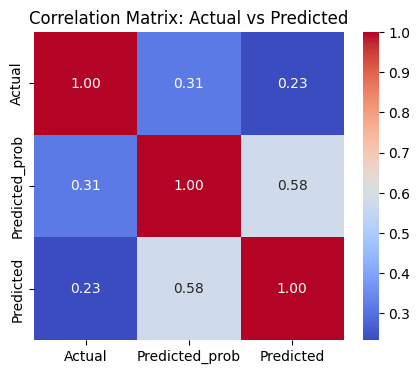

In [18]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted_prob': y_prob,
    'Predicted': y_pred
}) #making the dataframe

corr_matrix = comparison.corr()
print(corr_matrix)
#the corr matrix

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Actual vs Predicted')
plt.show()


You can also use 1 independent feature and the target to show the fit of data in a sigmoid curve through visualization

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


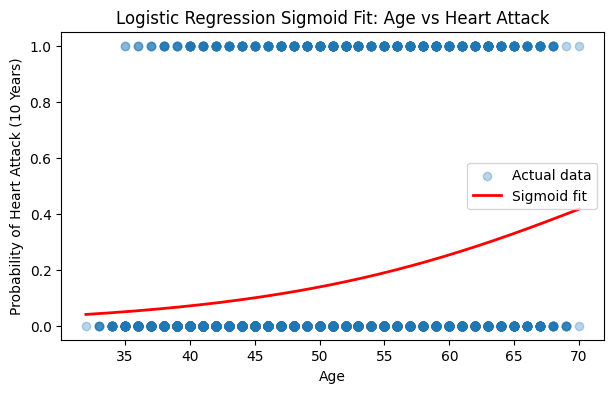

In [19]:
X_single = df_clean[['age']]
y_single = df_clean['TenYearCHD'] #choosing one feature

model_single = LogisticRegression()
model_single.fit(X_single, y_single) #connecting the logistic reg on the age feature

age_range = np.linspace(X_single.min(), X_single.max(), 300).reshape(-1,1)
probabilities = model_single.predict_proba(age_range)[:,1]
plt.figure(figsize=(7,4))
plt.scatter(X_single, y_single, alpha=0.3, label='Actual data')
plt.plot(age_range, probabilities, color='red', linewidth=2, label='Sigmoid fit')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Attack (10 Years)')
plt.title('Logistic Regression Sigmoid Fit: Age vs Heart Attack')
plt.legend()
plt.show()


**Note**:

Explain your insights at every step, what you interpret from the visualizations or at the end and conclude the outputs that show up after running your code.